In [19]:
import pandas as pd
df_1=pd.read_csv('pimaImb-5-1tra.csv')
df_2=pd.read_csv('pimaImb-5-1tst.csv')
print(df_1.shape)
df_1.head()


(614, 9)


,Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,Class
0,14.0,175.0,62.0,30.0,0.0,33.6,0.212,38.0,positive
1,4.0,146.0,78.0,0.0,0.0,38.5,0.520,67.0,positive
2,15.0,136.0,70.0,32.0,110.0,37.1,0.153,43.0,positive
3,5.0,116.0,74.0,29.0,0.0,32.3,0.660,35.0,positive
4,6.0,0.0,68.0,41.0,0.0,39.0,0.727,41.0,positive


In [20]:
print(df_2.shape)
df_2.head()

(154, 9)


,Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,Class
0,3.0,107.0,62.0,13.0,48.0,22.9,0.678,23.0,positive
1,3.0,169.0,74.0,19.0,125.0,29.9,0.268,31.0,positive
2,4.0,171.0,72.0,0.0,0.0,43.6,0.479,26.0,positive
3,0.0,189.0,104.0,25.0,0.0,34.3,0.435,41.0,positive
4,5.0,109.0,62.0,41.0,129.0,35.8,0.514,25.0,positive


In [21]:
dataset=pd.concat([df_1,df_2])
dataset.to_csv("pima.csv")

In [22]:
dataset=pd.read_csv("DataSets/pima.csv")
dataset=dataset.drop(columns=['Unnamed: 0'])
dataset.head()

,Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,Class
0,14.0,175.0,62.0,30.0,0.0,33.6,0.212,38.0,positive
1,4.0,146.0,78.0,0.0,0.0,38.5,0.520,67.0,positive
2,15.0,136.0,70.0,32.0,110.0,37.1,0.153,43.0,positive
3,5.0,116.0,74.0,29.0,0.0,32.3,0.660,35.0,positive
4,6.0,0.0,68.0,41.0,0.0,39.0,0.727,41.0,positive


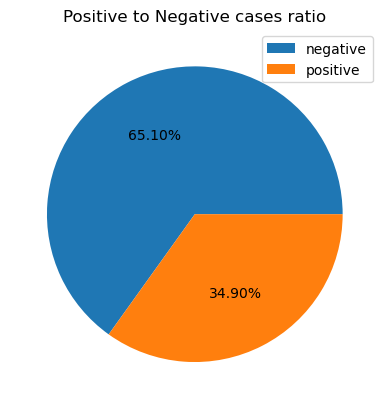

In [23]:
import matplotlib.pyplot as plt
counts = dataset["Class"].value_counts()
plt.pie(counts, autopct="%0.2f%%")
plt.legend(counts.index)
plt.title("Positive to Negative cases ratio")
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categoricals = ["Class"]
for i in categoricals:
    dataset[i] = le.fit_transform(dataset[i])
dataset.head()

,Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,Class
0,14.0,175.0,62.0,30.0,0.0,33.6,0.212,38.0,1
1,4.0,146.0,78.0,0.0,0.0,38.5,0.520,67.0,1
2,15.0,136.0,70.0,32.0,110.0,37.1,0.153,43.0,1
3,5.0,116.0,74.0,29.0,0.0,32.3,0.660,35.0,1
4,6.0,0.0,68.0,41.0,0.0,39.0,0.727,41.0,1


In [25]:
# Replace the name of one column
new_column_name = "result"  # Replace with your desired column name
column_to_replace = "Class"  # Replace with the name of the column you want to replace
dataset.rename(columns={column_to_replace: new_column_name}, inplace=True)

In [26]:
dataset.head()

,Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result
0,14.0,175.0,62.0,30.0,0.0,33.6,0.212,38.0,1
1,4.0,146.0,78.0,0.0,0.0,38.5,0.520,67.0,1
2,15.0,136.0,70.0,32.0,110.0,37.1,0.153,43.0,1
3,5.0,116.0,74.0,29.0,0.0,32.3,0.660,35.0,1
4,6.0,0.0,68.0,41.0,0.0,39.0,0.727,41.0,1


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=['result']), dataset['result'], test_size=0.2)
X_train,y_train

(     Preg   Plas   Pres  Skin   Insu  Mass   Pedi   Age
 656   5.0   88.0   66.0  21.0   23.0  24.4  0.342  30.0
 400   0.0  129.0   80.0   0.0    0.0  31.2  0.703  29.0
 529   4.0  189.0  110.0  31.0    0.0  28.5  0.680  37.0
 192   0.0  179.0   50.0  36.0  159.0  37.8  0.455  22.0
 474   6.0   96.0    0.0   0.0    0.0  23.7  0.190  28.0
 ..    ...    ...    ...   ...    ...   ...    ...   ...
 611   5.0  117.0   92.0   0.0    0.0  34.1  0.337  38.0
 697   4.0  112.0   78.0  40.0    0.0  39.4  0.236  38.0
 447   8.0  120.0    0.0   0.0    0.0  30.0  0.183  38.0
 714   3.0   78.0   70.0   0.0    0.0  32.5  0.270  39.0
 354   6.0  144.0   72.0  27.0  228.0  33.9  0.255  40.0
 
 [614 rows x 8 columns],
 656    0
 400    0
 529    0
 192    1
 474    0
       ..
 611    0
 697    0
 447    1
 714    0
 354    0
 Name: result, Length: 614, dtype: int32)

In [28]:
training_data=X_train.assign(result=y_train)
training_data

,Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result
656,5.0,88.0,66.0,21.0,23.0,24.4,0.342,30.0,0
400,0.0,129.0,80.0,0.0,0.0,31.2,0.703,29.0,0
529,4.0,189.0,110.0,31.0,0.0,28.5,0.680,37.0,0
192,0.0,179.0,50.0,36.0,159.0,37.8,0.455,22.0,1
474,6.0,96.0,0.0,0.0,0.0,23.7,0.190,28.0,0
...,...,...,...,...,...,...,...,...,...
611,5.0,117.0,92.0,0.0,0.0,34.1,0.337,38.0,0
697,4.0,112.0,78.0,40.0,0.0,39.4,0.236,38.0,0
447,8.0,120.0,0.0,0.0,0.0,30.0,0.183,38.0,1
714,3.0,78.0,70.0,0.0,0.0,32.5,0.270,39.0,0


In [29]:
testing_data=X_test.assign(result=y_test)
testing_data

,Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result
642,0.0,127.0,80.0,37.0,210.0,36.3,0.804,23.0,0
678,4.0,173.0,70.0,14.0,168.0,29.7,0.361,33.0,1
738,3.0,171.0,72.0,33.0,135.0,33.3,0.199,24.0,1
12,10.0,101.0,86.0,37.0,0.0,45.6,1.136,38.0,1
554,4.0,145.0,82.0,18.0,0.0,32.5,0.235,70.0,1
...,...,...,...,...,...,...,...,...,...
460,11.0,127.0,106.0,0.0,0.0,39.0,0.190,51.0,0
370,3.0,176.0,86.0,27.0,156.0,33.3,1.154,52.0,1
7,4.0,146.0,92.0,0.0,0.0,31.2,0.539,61.0,1
649,7.0,114.0,66.0,0.0,0.0,32.8,0.258,42.0,1


In [30]:
testing_data.to_csv("DataSets/pima_test.csv")

In [31]:
class_minority_df=training_data[training_data['result']==1]
class_minority_df.shape

(208, 9)

In [32]:
class_minority_df.head()

,Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result
192,0.0,179.0,50.0,36.0,159.0,37.8,0.455,22.0,1
257,7.0,109.0,80.0,31.0,0.0,35.9,1.127,43.0,1
3,5.0,116.0,74.0,29.0,0.0,32.3,0.660,35.0,1
265,1.0,163.0,72.0,0.0,0.0,39.0,1.222,33.0,1
202,2.0,197.0,70.0,99.0,0.0,34.7,0.575,62.0,1


In [33]:
class_majority_df=training_data[training_data['result']==0]
print(class_majority_df.shape)
class_majority_df.head()


(406, 9)


,Preg,Plas,Pres,Skin,Insu,Mass,Pedi,Age,result
656,5.0,88.0,66.0,21.0,23.0,24.4,0.342,30.0,0
400,0.0,129.0,80.0,0.0,0.0,31.2,0.703,29.0,0
529,4.0,189.0,110.0,31.0,0.0,28.5,0.680,37.0,0
474,6.0,96.0,0.0,0.0,0.0,23.7,0.190,28.0,0
25,8.0,85.0,55.0,20.0,0.0,24.4,0.136,42.0,0


In [34]:
class_majority_df.to_csv('DataSets/pima_majority.csv')
class_minority_df.to_csv('DataSets/pima_minority.csv')